In [1]:
# do inline plots with Python's matplotlib library
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
# load the Meep and MPB modules in Python
import meep as mp
from meep import mpb

# First, we will define some parameters describing our structure.  
# Defining them symbolically here makes it easier to change them.

eps_hi = 12  # the waveguide dielectric constant
eps_lo = 1  # the surrounding low-dielectric material
h = 1/2/np.sqrt(eps_hi)       # the thickness of the waveguide (arbitrary units)
Y = 5      # the size of the computational cell in the y direction

# Here we define the size of the computational cell.  Since it is 2d,
# it has no-size in the z direction.  Because it is a waveguide in the
# x direction, then the eigenproblem at a given k has no-size in the
# x direction as well.
geometry_lattice = mp.Lattice(size=(0, Y))

# the default-material is what fills space where we haven't placed objects
default_material = mp.Medium(epsilon=eps_lo)

# a list of geometric objects to create structures in our computation:
# (in this case, we only have one object, a block to make the waveguide)
geometry = [mp.Block(center=(0,0), # center of computational cell
                     size=(mp.inf, h, mp.inf),
                     material=mp.Medium(epsilon=eps_hi))]

# MPB discretizes space with a given resolution.   Here, we set
# a resolution of 32 pixels per unit distance.  Thus, with Y=10
# our comptuational cell will be 320 pixels wide.  In general,
# you should make the resolution fine enough so that the pixels
# are much smaller than the wavelength of the light.
#   -- to get high accuracy results, in practice you 
#      double the resolution until your answer stops changing
#      to your desired tolerance
resolution = 200

# Generally, we want omega(k) for a range of k values.  MPB
# can automatically interpolate a set of k values between any
# given bounds.  Here, we will interpolate 10 k's between 0 and 2.
#
# in MPB, the k vectors are in the basis of the primitive 
# reciprocal lattice vectors.   Here, for a 1d cell with zero
# width in the x direction, the units of kx are just units of 2pi/a
# where a is our distance units.

kmin = 0
kmax = 2
k_interp = 9
#k_points = mp.interpolate(k_interp, [mp.Vector3(kmin), mp.Vector3(kmax)])
#k_points =[mp.Vector3(3.322)]
#k_points =[mp.Vector3(2.854)]
k_points =[mp.Vector3(1.654)]
# we also need to specify how many eigenmodes we want to compute:
num_bands = 2

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    #target_freq = 1.0,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=default_material)

ms.run_te(mpb.fix_efield_phase)
ms.all_freqs

Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
     block, center = (0,0,0)
          size (1e+20,0.144338,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
1 k-points
  Vector3<1.654, 0.0, 0.0>
elapsed time for initialization: 0.004185199737548828
elapsed time for k point: 0.018075942993164062
total elapsed time for run: 0.02618122100830078
done


array([[1.00017734, 1.58893353]])

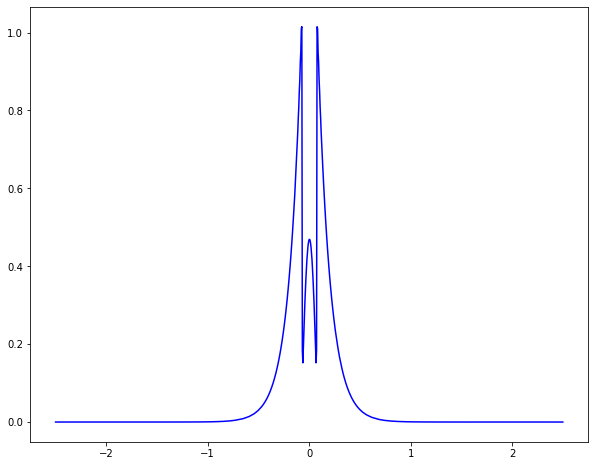

In [4]:
eps = ms.get_epsilon()
y = np.linspace(-Y/2,Y/2,eps.size)
plt.figure(figsize=(10,8))
band_t = 1
hz1 = ms.get_hfield(band_t)[:,0,0,2] # the z component of band t
ex1 = ms.get_efield(band_t)[:,0,0,0] # the x component of band t
ey1 = ms.get_efield(band_t)[:,0,0,1] # the y component of band t
#plt.plot(y, np.real(hz1), "r-")
#plt.plot(y, np.real(ex1), "b-")
plt.plot(y, np.real(ey1), "b-")

In [5]:
with open('Eigenmode.txt', 'w') as f:
    for i in range(np.size(y)):
        f.write("%s %s %s\n" % (y[i], np.real(hz1[i]), np.real(ey1[i])))